Calculate the amount of missing values in datasets (section Data Preparation in thesis).

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

import datasets

In [2]:
ds = datasets.load('2013')

In [95]:
ds.y.isnull

<bound method _func_slash_method_wrapper.<locals>.func of <xarray.DataArray 'y' (rat: 26, session: 3, time: 45001)>
[3510078 values with dtype=float64]
Coordinates:
  * rat        (rat) object '50' '51' '52' '53' '54' '28' '29' '30' '31' ...
  * session    (session) object 'week1' 'week2' 'week3'
  * time       (time) timedelta64[ns] 00:00:00 00:00:00.040000 ...
    treatment  (rat) object 'ss' 'ss' 'ss' 'ss' 'ss' 'qs' 'qs' 'qs' 'qs' ...
    trial      (rat, session) object '326' '355' '386' '327' '356' '387' ...>

In [99]:
r = []
for x in ds.x.data.reshape(ds.x.data.shape[0]*ds.x.data.shape[1],-1):
    a = x.flatten()
    mask = np.concatenate(([False],np.isnan(a),[False]))
    if ~mask.any():
        r.append(0)
    else:
        idx = np.nonzero(mask[1:] != mask[:-1])[0]
        r.append((idx[1::2] - idx[::2]).max())
max(r)

866

In [100]:
np.isnan(ds.x.data.flatten()).sum()

35358

In [37]:
for trial in sorted(ds.trial.data.flatten(),key=int):
    print(trial)

4
5
6
7
8
9
10
12
16
17
18
19
20
21
22
24
28
29
30
31
32
33
34
36
40
41
42
43
44
45
46
48
52
53
54
55
56
57
58
60
64
65
66
67
68
69
70
72
76
77
78
79
80
81
82
84
88
89
90
91
92
93
94
96
100
101
102
103
104
105
106
108
112
113
114
115
116
117
118
120


In [53]:
' & '.join([str(ds.sel(rat=rat).treatment.data) for rat in ds.rat.data])

's & s & s & q & q & q & q & q'

In [54]:
ds.session

<xarray.DataArray 'session' (session: 10)>
array(['injection1', 'injection2', 'injection3', 'injection4', 'injection5',
       'injection6', 'injection7', 'injection8', 'injection9', 'injection10'], dtype=object)
Coordinates:
  * session  (session) object 'injection1' 'injection2' 'injection3' ...

In [69]:
for rat in sorted(ds.rat.data,key=int):
    for session in sorted(ds.session.data,key=lambda x:int(x[9:])):
        x = ds.sel(rat=rat,session=session).trial
        print(x.data,end=' ')
    print()

4 16 28 40 52 64 76 88 100 112 
5 17 29 41 53 65 77 89 101 113 
6 18 30 42 54 66 78 90 102 114 
7 19 31 43 55 67 79 91 103 115 
8 20 32 44 56 68 80 92 104 116 
9 21 33 45 57 69 81 93 105 117 
10 22 34 46 58 70 82 94 106 118 
12 24 36 48 60 72 84 96 108 120 


In [72]:
coords_2014 = np.array([
    ['4', '16', '28', '40', '52', '64', '76', '88', '100', '112'],
    ['5', '17', '29', '41', '53', '65', '77', '89', '101', '113'],
    ['6', '18', '30', '42', '54', '66', '78', '90', '102', '114'],
    ['7', '19', '31', '43', '55', '67', '79', '91', '103', '115'],
    ['8', '20', '32', '44', '56', '68', '80', '92', '104', '116'],
    ['9', '21', '33', '45', '57', '69', '81', '93', '105', '117'],
    ['10', '22', '34', '46', '58', '70', '82', '94', '106', '118'],
    ['12', '24', '36', '48', '60', '72', '84', '96', '108', '120']
]).T

In [82]:
for i,x in enumerate(coords_2014,1):
    print(f's{i} & '+' & '.join(x)+' \\\\')

s1 & 4 & 5 & 6 & 7 & 8 & 9 & 10 & 12 \\
s2 & 16 & 17 & 18 & 19 & 20 & 21 & 22 & 24 \\
s3 & 28 & 29 & 30 & 31 & 32 & 33 & 34 & 36 \\
s4 & 40 & 41 & 42 & 43 & 44 & 45 & 46 & 48 \\
s5 & 52 & 53 & 54 & 55 & 56 & 57 & 58 & 60 \\
s6 & 64 & 65 & 66 & 67 & 68 & 69 & 70 & 72 \\
s7 & 76 & 77 & 78 & 79 & 80 & 81 & 82 & 84 \\
s8 & 88 & 89 & 90 & 91 & 92 & 93 & 94 & 96 \\
s9 & 100 & 101 & 102 & 103 & 104 & 105 & 106 & 108 \\
s10 & 112 & 113 & 114 & 115 & 116 & 117 & 118 & 120 \\


In [4]:
ds13 = datasets.load('2013')
ds14 = datasets.load('2014')

In [88]:
ds13.trial == 

<xarray.Dataset>
Dimensions:      (rat: 26, session: 3, time: 45001)
Coordinates:
  * rat          (rat) object '50' '51' '52' '53' '54' '28' '29' '30' '31' ...
  * session      (session) object 'week1' 'week2' 'week3'
  * time         (time) timedelta64[ns] 00:00:00 00:00:00.040000 ...
    treatment    (rat) object 'ss' 'ss' 'ss' 'ss' 'ss' 'qs' 'qs' 'qs' 'qs' ...
    trial        (rat, session) object '326' '355' '386' '327' '356' '387' ...
Data variables:
    area         (rat, session, time) float64 27.81 39.69 62.34 73.39 134.3 ...
    areachange   (rat, session, time) float64 nan 12.98 26.7 135.7 207.7 ...
    direction    (rat, session, time) float64 135.0 135.0 118.1 46.63 -73.8 ...
    elongation   (rat, session, time) float64 0.1384 0.1729 0.4803 0.2726 ...
    time_offset  (rat, session) float64 2.48 2.76 0.04 2.68 3.04 2.2 2.68 ...
    x            (rat, session, time) float64 96.12 96.48 97.23 100.6 100.8 ...
    y            (rat, session, time) float64 -26.22 -27.0 -28.71

In [82]:
((ds13.x.diff('time')**2+ds13.y.diff('time')**2)**0.5 > 2).sum()

/usr/lib/python3.6/site-packages/xarray/core/variable.py:1164: RuntimeWarning: invalid value encountered in greater
  if not reflexive


<xarray.DataArray ()>
array(29294)

In [10]:
diff13 = (ds13.x.diff('time')**2+ds13.y.diff('time')**2)**0.5
diff14 = (ds14.x.diff('time')**2+ds14.y.diff('time')**2)**0.5

In [16]:
diff13.data.flatten()

array([  0.86483964,   1.8656571 ,  17.75582104, ...,   0.02623833,
         0.05713423,   0.07276215])

In [85]:
(diff13 > diff13.mean() + 2 * diff13.std()).sum()/diff13.size

/usr/lib/python3.6/site-packages/xarray/core/variable.py:1164: RuntimeWarning: invalid value encountered in greater
  if not reflexive


<xarray.DataArray ()>
array(0.010576353276353277)

In [86]:
(diff14 > diff14.mean() + 2 * diff14.std()).sum()/diff14.size

/usr/lib/python3.6/site-packages/xarray/core/variable.py:1164: RuntimeWarning: invalid value encountered in greater
  if not reflexive


<xarray.DataArray ()>
array(0.05395869908220183)

In [47]:
diff13

<xarray.DataArray (rat: 26, session: 3, time: 45000)>
array([[[  0.86484 ,   1.865657, ...,   0.052562,   0.076194],
        [  2.917967,   3.364639, ...,   0.064713,   0.067724],
        [       nan,        nan, ...,   0.081252,   0.309008]],

       [[  2.770207,   5.053282, ...,   0.09039 ,   0.056922],
        [  2.945572,   5.318961, ...,   0.221107,   0.223458],
        [  3.925882,  10.259297, ...,   0.147686,   0.135453]],

       ..., 
       [[  5.245693,   8.046254, ...,   0.046325,   0.011921],
        [  3.770109,   4.99057 , ...,   0.111169,   0.098098],
        [  4.547678,        nan, ...,   0.017135,   0.011325]],

       [[  4.855694,   6.995924, ...,   0.030417,   0.098959],
        [  3.056382,   3.050872, ...,   0.017066,   0.372763],
        [  3.427167,   4.428842, ...,   0.057134,   0.072762]]])
Coordinates:
  * rat        (rat) object '50' '51' '52' '53' '54' '28' '29' '30' '31' ...
  * session    (session) object 'week1' 'week2' 'week3'
  * time       (time) t

In [48]:
ds13

<xarray.Dataset>
Dimensions:      (rat: 26, session: 3, time: 45001)
Coordinates:
  * rat          (rat) object '50' '51' '52' '53' '54' '28' '29' '30' '31' ...
  * session      (session) object 'week1' 'week2' 'week3'
  * time         (time) timedelta64[ns] 00:00:00 00:00:00.040000 ...
    treatment    (rat) object 'ss' 'ss' 'ss' 'ss' 'ss' 'qs' 'qs' 'qs' 'qs' ...
    trial        (rat, session) object '326' '355' '386' '327' '356' '387' ...
Data variables:
    area         (rat, session, time) float64 27.81 39.69 62.34 73.39 134.3 ...
    areachange   (rat, session, time) float64 nan 12.98 26.7 135.7 207.7 ...
    direction    (rat, session, time) float64 135.0 135.0 118.1 46.63 -73.8 ...
    elongation   (rat, session, time) float64 0.1384 0.1729 0.4803 0.2726 ...
    time_offset  (rat, session) float64 2.48 2.76 0.04 2.68 3.04 2.2 2.68 ...
    x            (rat, session, time) float64 96.12 96.48 97.23 100.6 100.8 ...
    y            (rat, session, time) float64 -26.22 -27.0 -28.71

In [3]:
dists = np.sqrt(ds.x.diff('time')**2 + ds.y.diff('time')**2)

In [4]:
dists.max()

<xarray.DataArray ()>
array(206.51865562965492)

In [90]:
speed = 9.6/60/60/25*1000*100

In [71]:
import seaborn as sns

In [81]:
ds = datasets.load('2013')

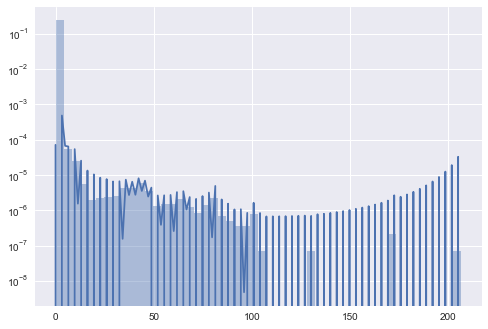

In [82]:
dists = np.sqrt(ds.x.diff('time')**2 + ds.y.diff('time')**2)
df = dists.data.flatten()
df = df[~np.isnan(df)]
ax = sns.distplot(df)
ax.set_yscale('log')

In [83]:
x = (df > speed).sum()

In [84]:
x, x/len(df)*100

(808, 0.023261926703626642)

In [85]:
df.var()

0.67393179174705575

In [86]:
ds = datasets.load('2014')
dists = np.sqrt(ds.x.diff('time')**2 + ds.y.diff('time')**2)
df = dists.data.flatten()
df = df[~np.isnan(df)]
x = (df > speed).sum()

In [87]:
x, x/len(df)*100

(93, 0.0025836261442963534)

In [88]:
df.var()

0.40720991277863222

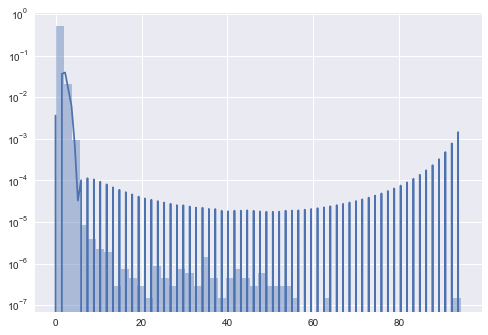

In [89]:
ax = sns.distplot(df)
ax.set_yscale('log')